# Real Estate Data Analysis Project

**We aim to develop a **predictive model** that estimates the number of interactions a property will receive within a specified timeframe. [Dataset is taken from kraggle] For simplicity, our initial focus is on forecasting interactions within **3 days** and **7 days** of a property's activation. However, this aspect remains open-ended, allowing for the incorporation of alternative time intervals based on further analysis and insights.**

### **0. Exploratory Analysis**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
pd.set_option('max_columns',50)
pd.set_option('max_rows',10)


In [4]:
import pandas as pd  # Ensure Pandas is imported

# Read all data without infer_datetime_format
data = pd.read_csv('property_data_set.csv', parse_dates=['activation_date'], dayfirst=True)

interaction = pd.read_csv('property_interactions.csv', parse_dates=['request_date'], dayfirst=True)


In [5]:
print('Property data shape', data.shape)
print('Pics data shape', pics.shape)
print('interaction data shape', interaction.shape)

Property data shape (28888, 21)
Pics data shape (28888, 2)
interaction data shape (170611, 2)


In [6]:
#sample of property data
data.sample(2)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
3922,ff808181542defd7015432b954f13ef0,BHK2,2017-03-27 12:30:00,2,1,3.0,SEMI_FURNISHED,0,12.944272,77.604857,BACHELOR,0,Adugodi,BOTH,0,1357,0,560030.0,25000,250000,IF
12306,ff8081815a21c1b1015a23b66ac10e24,BHK3,2017-02-10 11:39:00,2,1,4.0,SEMI_FURNISHED,0,12.957321,77.716521,FAMILY,1,Kundalahalli,BOTH,3,1200,0,560037.0,22000,150000,AP


In [7]:
# Sample of pics data
pics.sample(2)

,property_id,photo_urls
4275,ff80818154c3582a0154c3c9ca100f73,"[{\title\"":\""\"",\""name\"":\""files[]\"",\""imagesM..."
17358,ff8081815a701e88015a7991d6c7055d,NaN


In [8]:
#sample  of interaction data
interaction.sample(2)

,property_id,request_date
155515,ff8081815ae03cc6015aeb123bb5234b,2017-03-29 16:59:45
25056,ff808181538a8cef015392abe0855fe3,2017-04-07 20:37:35


In [9]:
# Sample of interaction data
interaction.sample(2)

,property_id,request_date
55827,ff808181597010850159723a703b1161,2017-03-11 17:48:17
97902,ff8081815a56a8e2015a57753e4d4071,2017-03-06 11:14:41


### **1. Data Engineering [Handling Pics File Data]**

In [10]:
# Show the first five rows
pics.head()

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [11]:
# Types of columns
pics.dtypes

property_id    object
photo_urls     object
dtype: object

In [12]:
# Number of nan values
pics.isna().sum()

property_id        0
photo_urls     11022
dtype: int64

In [13]:
# Try to correct the first Json
text_before = pics['photo_urls'][0]
print('Before Correction: \n\n', text_before)
# Try to replace corrupted values then convert to json 
text_after = text_before.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","')
print("\n\nAfter correction and converted to json: \n\n", json.loads(text_after))

Before Correction: 

 [{\title\":\"Balcony\",\"name\":\"IMG_20131006_120837.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_65149_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_65149_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_65149_large.jpg\"},\"displayPic\":false},{\"title\":\"Bathroom\",\"name\":\"IMG_20131006_120734.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_63511_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_63511_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_63511_large.jpg\"},\"displayPic\":false},{\"title\":\"Bedroom\",\"name\":\"IMG_20131006_120643.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_16708_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20

In [14]:
# Function to correct corrupted json and get count of photos
def correction (x):
    # if value is null put count with 0 photos
    if x is np.nan or x == 'NaN':
        return 0
    else :
        # Replace corrupted values then convert to json and get count of photos
        return len(json.loads( x.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","') ))
        
# Apply Correction Function
pics['photo_count'] = pics['photo_urls'].apply(correction)

In [15]:
# Delete photo_urls column 
del pics['photo_urls']
# Sample of Pics data
pics.sample(5)

,property_id,photo_count
6467,ff80818157f751030157fa77bf2c2b75,20
11439,ff8081815a1817c2015a188b2609134b,10
17716,ff8081815a702410015a740c39935784,7
19713,ff8081815a9514a4015a97d3a9b16b93,1
26095,ff8081815af0f7fd015af47819201a5f,0


In [16]:
# Merge data with interactions data on property_id
num_req = pd.merge(data, interaction, on ='property_id')[['property_id', 'request_date', 'activation_date']]
num_req.head(5)

,property_id,request_date,activation_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00


In [18]:
import numpy as np
import pandas as pd

# Ensure columns are in datetime format
num_req['request_date'] = pd.to_datetime(num_req['request_date'])
num_req['activation_date'] = pd.to_datetime(num_req['activation_date'])

# Calculate the difference in days
num_req['request_day'] = (num_req['request_date'] - num_req['activation_date']).dt.days


In [19]:
# Show the first row of data
num_req.head(1)

,property_id,request_date,activation_date,request_day
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00,1


In [20]:
# Get a count of requests in the first 3 days  
num_req_within_3d = num_req[num_req['request_day'] < 3].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 3 days
num_req_within_3d = num_req_within_3d.rename({'request_day':'request_day_within_3d'},axis=1)
# Dataset with the number of requests within 3 days
num_req_within_3d

,property_id,request_day_within_3d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,3
2,ff808081470c645401470fb03f5800a6,15
3,ff808081470c6454014715eaa5960281,5
4,ff808081474aa867014771a0298f0aa6,25
...,...,...
13205,ff8081815b1fdda8015b1fdf585c004b,2
13206,ff8081815b1fdda8015b1fe675ae0146,5
13207,ff8081815b1fdda8015b1ffee8a305d2,2
13208,ff8081815b200540015b20158b0103c9,2


In [21]:
num_req_within_3d['request_day_within_3d'].value_counts()[:10]

request_day_within_3d
1     5940
2     2741
3     1579
4      887
5      583
6      373
7      246
8      186
9      148
11     105
Name: count, dtype: int64

In [22]:
def divide(x):
    if x in [1,2]:
        return 'cat_1_to_2'
    elif x in [3,4,5]:
        return 'cat_3_to_5'
    else:
        return 'cat_above_5'

In [23]:
num_req_within_3d['categories_3day'] = num_req_within_3d['request_day_within_3d'].apply(divide)
num_req_within_3d.head(3)

,property_id,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,3,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,15,cat_above_5


In [24]:
num_req_within_3d['categories_3day'].value_counts()

categories_3day
cat_1_to_2     8681
cat_3_to_5     3049
cat_above_5    1480
Name: count, dtype: int64

### **2. Number of Interaction Within 7 Days**

In [25]:
# Get a count of requests in the first 7 days  
num_req_within_7d = num_req[num_req['request_day'] < 7].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 7 days
num_req_within_7d = num_req_within_7d.rename({'request_day':'request_day_within_7d'},axis=1)
# Dataset with the number of requests within 7 days
num_req_within_7d

,property_id,request_day_within_7d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,5
2,ff808081470c645401470fb03f5800a6,22
3,ff808081470c6454014715eaa5960281,7
4,ff808081474aa867014771a0298f0aa6,52
...,...,...
17381,ff8081815b1fdda8015b1fe675ae0146,8
17382,ff8081815b1fdda8015b1ffee8a305d2,3
17383,ff8081815b1fdda8015b2000369205fd,2
17384,ff8081815b200540015b20158b0103c9,2


In [26]:
num_req_within_7d['request_day_within_7d'].value_counts()[:10]

request_day_within_7d
1     5856
2     3381
3     2118
4     1421
5     1047
6      735
7      597
8      373
9      323
10     240
Name: count, dtype: int64

In [27]:
num_req_within_7d['categories_7day'] = num_req_within_7d['request_day_within_7d'].apply(divide)
num_req_within_7d.head(3)

,property_id,request_day_within_7d,categories_7day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5


In [28]:
num_req_within_7d['categories_7day'].value_counts()

categories_7day
cat_1_to_2     9237
cat_3_to_5     4586
cat_above_5    3563
Name: count, dtype: int64

#### Merge Data

In [29]:
data.sample()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
20987,ff8081815aa7d73a015aa85024753cf7,BHK1,2017-03-07 17:42:00,1,0,2.0,NOT_FURNISHED,0,12.808173,77.665822,FAMILY,0,Bommasandra Industrial Area,TWO_WHEELER,0,500,0,560099.0,5000,20000,IF


In [30]:
pics.sample()

,property_id,photo_count
27631,ff8081815b0a0ea4015b0a0fcb09002d,9


In [31]:
num_req_within_3d.sample()

,property_id,request_day_within_3d,categories_3day
11496,ff8081815ae03cc6015ae4b74698290f,3,cat_3_to_5


In [32]:
num_req_within_7d.sample()

,property_id,request_day_within_7d,categories_7day
5218,ff8081815974de96015978cc2a155fe6,2,cat_1_to_2


In [33]:
print(num_req_within_3d.shape)
print(num_req_within_7d.shape)

(13210, 3)
(17386, 3)


In [34]:
label_data = pd.merge(num_req_within_7d, num_req_within_3d, on ='property_id' , how='left')
# label_data['request_day_within_3d'] = label_data['request_day_within_3d'].fillna(0)
label_data.head(3)

,property_id,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5,15.0,cat_above_5


In [35]:
label_data.isna().sum()

property_id                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
dtype: int64

In [36]:
data_with_pics = pd.merge(data, pics, on ='property_id', how = 'left')
data_with_pics.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12


In [37]:
dataset = pd.merge(data_with_pics, label_data, on ='property_id')
dataset.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5


In [38]:
dataset.isna().sum()

property_id                 0
type                        0
activation_date             0
bathroom                    0
floor                       0
                         ... 
photo_count                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
Length: 26, dtype: int64

### **3. Exploratory Data Analysis and Processing**

In [39]:
# Sample of dataset
dataset.sample(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
3534,ff80818156b250810156b25f86f0030b,BHK3,2017-03-23 17:04:00,3,0,0.0,SEMI_FURNISHED,1,12.868124,77.616594,FAMILY,0,Akshayanagar,BOTH,2,1800,1,560076.0,26000,200000,IH,5,1,cat_1_to_2,1.0,cat_1_to_2
16406,ff8081815b04b57a015b0532504b4065,BHK1,2017-03-25 20:45:00,1,0,2.0,NOT_FURNISHED,0,12.946635,77.628470,ANYONE,0,Ejipura,TWO_WHEELER,10,500,0,560047.0,10000,50000,IF,0,5,cat_3_to_5,4.0,cat_3_to_5
8305,ff8081815a3ae13c015a3b56575f54fe,BHK1,2017-02-16 19:20:00,1,1,3.0,NOT_FURNISHED,0,12.966004,77.672940,ANYONE,0,Islampur,TWO_WHEELER,1,1000,0,560017.0,11000,100000,IF,1,1,cat_1_to_2,1.0,cat_1_to_2


In [40]:
dataset['locality'].value_counts()

locality
Whitefield                                                                                        517
JP Nagar                                                                                          415
Marathahalli                                                                                      414
HSR Layout                                                                                        380
Electronic City                                                                                   341
                                                                                                 ... 
Vayalikaval                                                                                         1
Prerana Tranquil, Kalkere Main Rd, Jayanti Nagar, Horamavu, Bengaluru, Karnataka 560016, India      1
JS Nagar, Bengaluru, Karnataka, India                                                               1
3rd Main Road, Kaveri Nagar, Bangalore, Karnataka 560032, India          

In [41]:
# Dropped those columns that won't have an effect on the number of requests
dataset = dataset.drop(['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality'  ] , axis=1)

In [42]:
# Some info about all columns
print('Column : Num. of null values')
print(dict(dataset.isna().sum()))
print('\n\n')
print('Column : data type')
print(dict(dataset.dtypes))

Column : Num. of null values
{'type': np.int64(0), 'bathroom': np.int64(0), 'floor': np.int64(0), 'total_floor': np.int64(23), 'furnishing': np.int64(0), 'gym': np.int64(0), 'lease_type': np.int64(0), 'lift': np.int64(0), 'parking': np.int64(0), 'property_age': np.int64(0), 'property_size': np.int64(0), 'swimming_pool': np.int64(0), 'rent': np.int64(0), 'deposit': np.int64(0), 'building_type': np.int64(38), 'photo_count': np.int64(0), 'request_day_within_7d': np.int64(0), 'categories_7day': np.int64(0), 'request_day_within_3d': np.int64(4176), 'categories_3day': np.int64(4176)}



Column : data type
{'type': dtype('O'), 'bathroom': dtype('int64'), 'floor': dtype('int64'), 'total_floor': dtype('float64'), 'furnishing': dtype('O'), 'gym': dtype('int64'), 'lease_type': dtype('O'), 'lift': dtype('int64'), 'parking': dtype('O'), 'property_age': dtype('int64'), 'property_size': dtype('int64'), 'swimming_pool': dtype('int64'), 'rent': dtype('int64'), 'deposit': dtype('int64'), 'building_type'

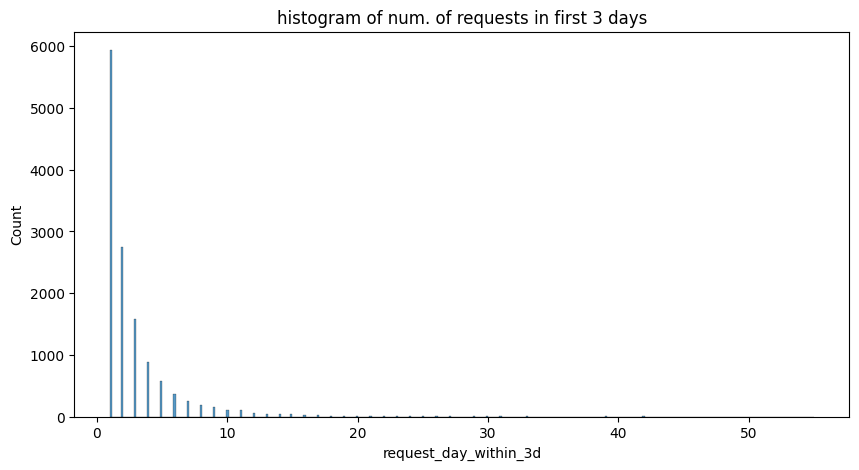

In [43]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

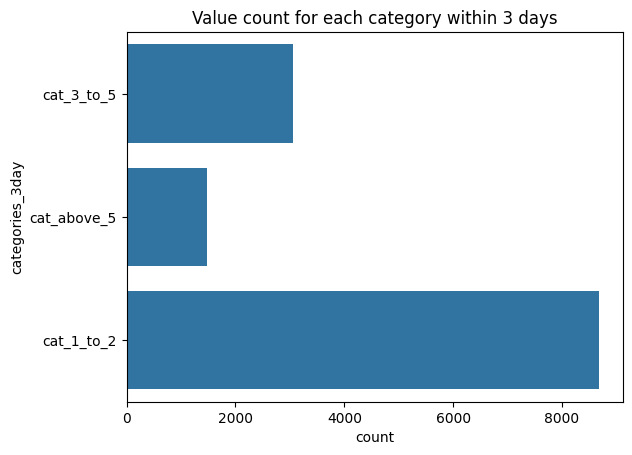

In [44]:
sns.countplot(y=dataset.categories_3day)
plt.title('Value count for each category within 3 days')
plt.show()

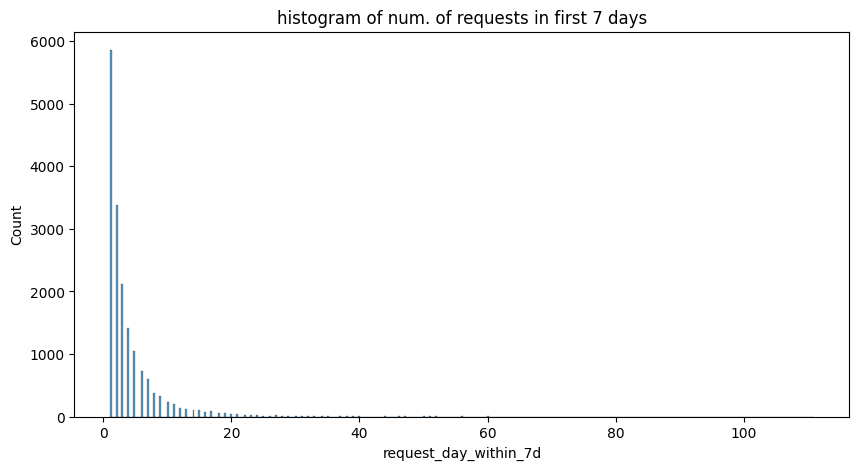

In [45]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

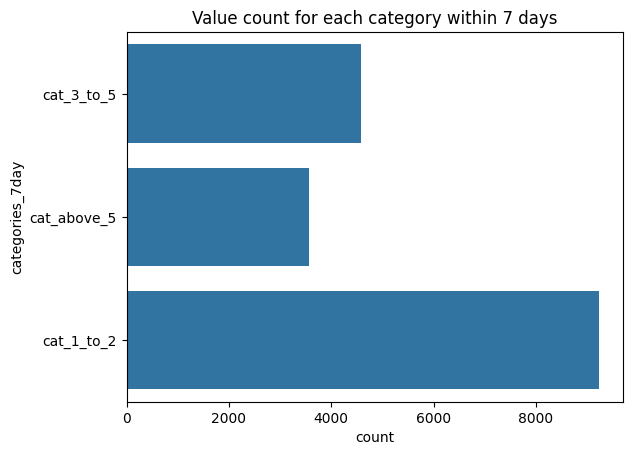

In [46]:
sns.countplot(y=dataset.categories_7day)
plt.title('Value count for each category within 7 days')
plt.show()

In [47]:
# Get categorical columns  
df_cat = dataset.select_dtypes(include=['object'])
# Get numeric columns
df_num = dataset.select_dtypes(exclude=['object'])

In [48]:
print("Categorical Columns : \n",list(df_cat.columns) )
print("Numeric Columns : \n",list(df_num.columns) )

Categorical Columns : 
 ['type', 'furnishing', 'lease_type', 'parking', 'building_type', 'categories_7day', 'categories_3day']
Numeric Columns : 
 ['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count', 'request_day_within_7d', 'request_day_within_3d']


In [49]:
df_cat.sample(2)

,type,furnishing,lease_type,parking,building_type,categories_7day,categories_3day
12392,BHK2,FULLY_FURNISHED,BACHELOR,TWO_WHEELER,IF,cat_1_to_2,cat_1_to_2
10229,BHK1,NOT_FURNISHED,ANYONE,TWO_WHEELER,IF,cat_1_to_2,NaN


In [50]:
# Show all values and get count of them in every categorical column
for col in df_cat.columns[:-2]:
    print('Column Name : ', col)
    print(df_cat[col].value_counts())
    print('\n-------------------------------------------------------------\n')

Column Name :  type
type
BHK2        8510
BHK1        4508
BHK3        2691
RK1         1497
BHK4         157
BHK4PLUS      23
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  furnishing
furnishing
SEMI_FURNISHED     13523
NOT_FURNISHED       2917
FULLY_FURNISHED      946
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  lease_type
lease_type
FAMILY      8401
ANYONE      8026
BACHELOR     928
COMPANY       31
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  parking
parking
TWO_WHEELER     8059
BOTH            7771
NONE             921
FOUR_WHEELER     635
Name: count, dtype: int64

-------------------------------------------------------------

Column Name :  building_type
building_type
IF    10171
AP     6000
IH     1177
Name: count, dtype: int64

-------------------------------------------------------------



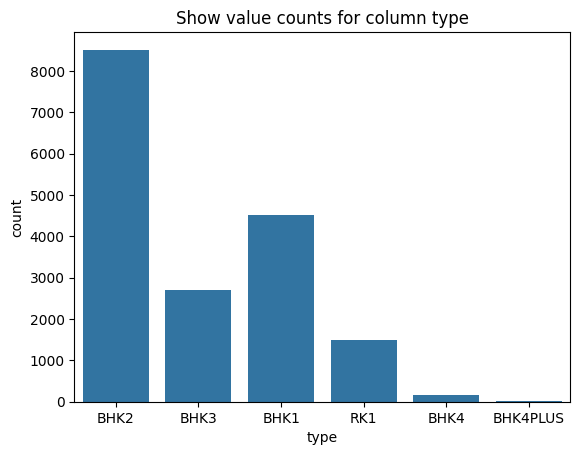

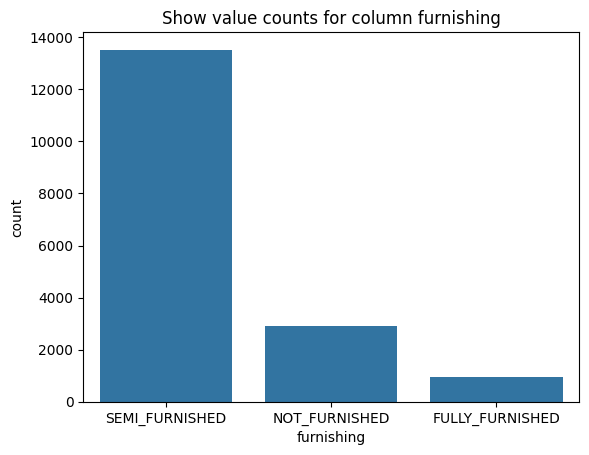

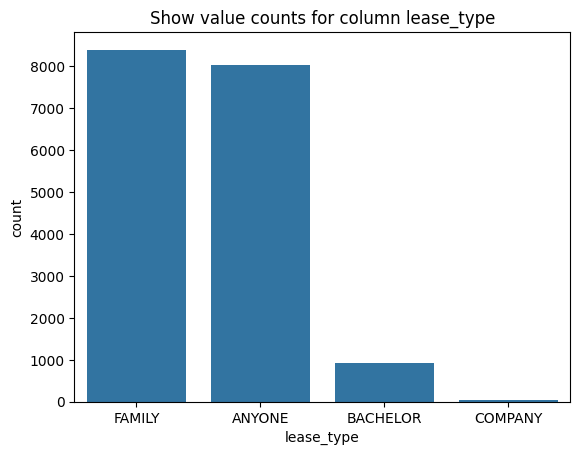

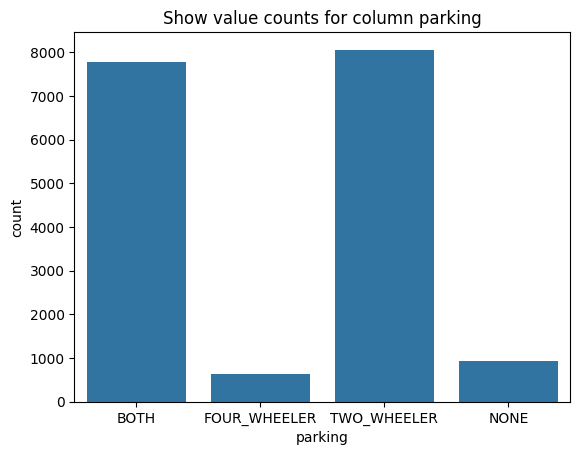

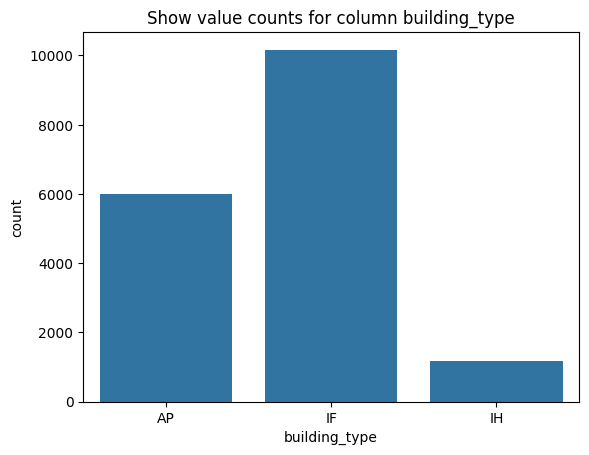

In [51]:
# Plot count of values in every columns 
for col in df_cat.columns[:-2]:
    sns.countplot(x = col,  
                  
            data = dataset
                 )
    plt.title(f'Show value counts for column {col}')
 
    # Show the plot
    plt.show()

In [52]:
df_num.head()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
0,1,3,4.0,1,1,2,850,1,12000,120000,7,4,4.0
1,2,4,11.0,1,1,1,1233,1,20000,150000,0,5,3.0
2,2,0,4.0,1,1,0,1200,0,15000,75000,12,22,15.0
3,2,3,4.0,0,0,1,1300,0,17000,150000,9,7,5.0
4,1,1,2.0,0,0,4,450,0,6500,40000,7,52,25.0


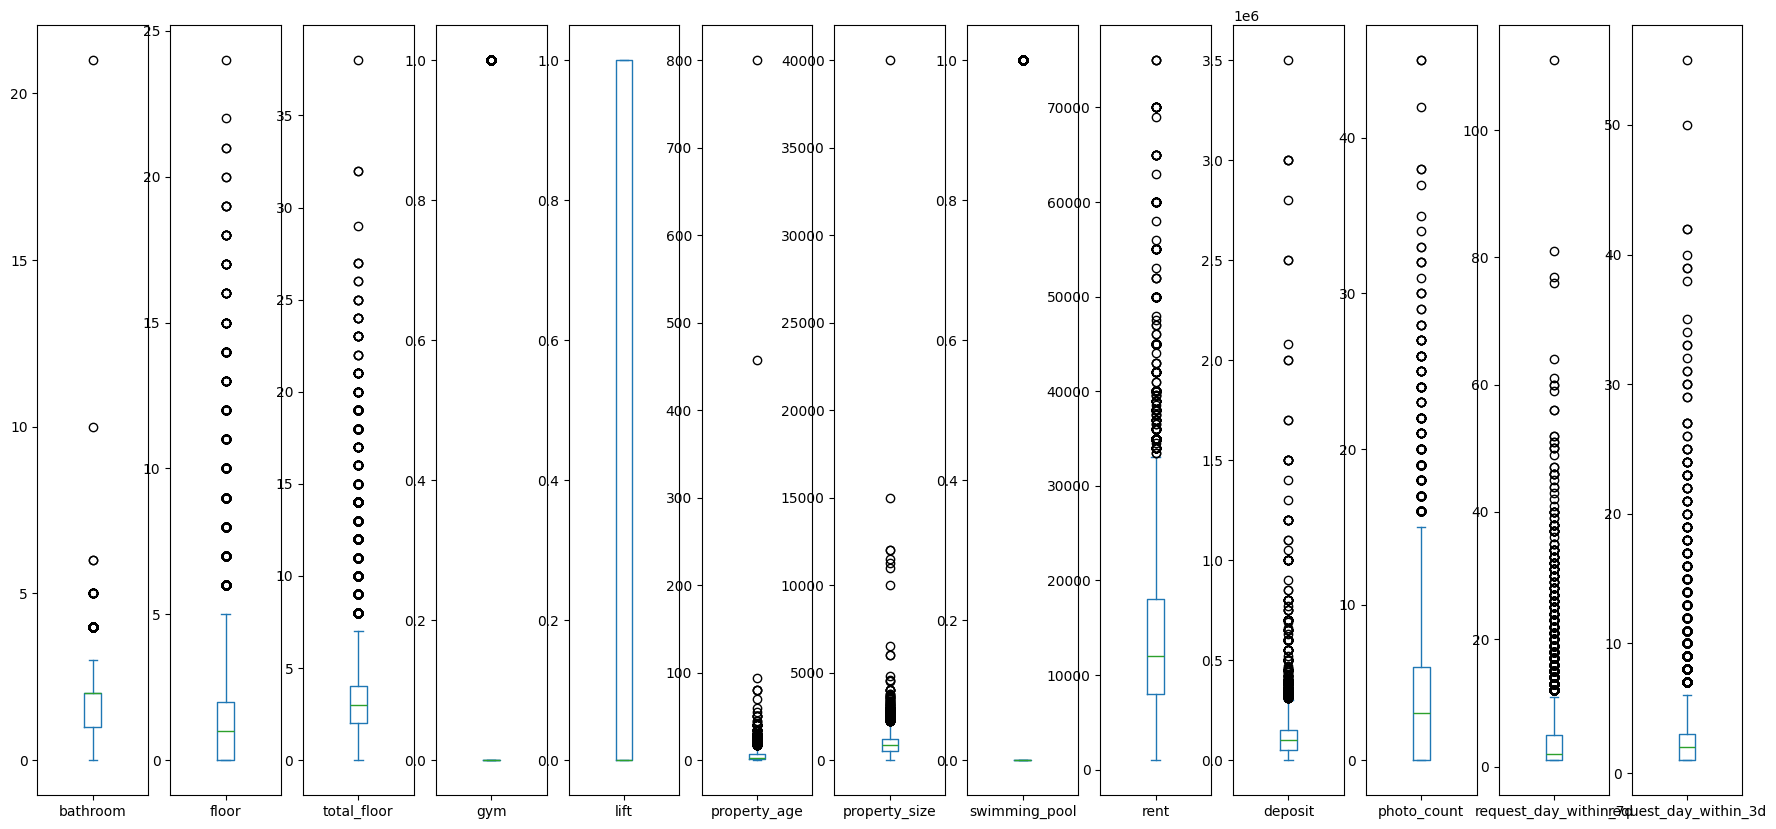

In [53]:
# Box Plot to show ranges of values and outliers
df_num.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

In [54]:
# Get some statistics about numeric columns
df_num.describe()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
count,17386.000000,17386.000000,17363.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,1.738600e+04,17386.000000,17386.000000,13210.000000
mean,1.702692,1.726101,3.382077,0.150063,0.265156,4.789141,912.091510,0.126769,13822.809847,1.145386e+05,3.803635,4.013632,2.802801
std,0.716630,2.041864,3.040158,0.357144,0.441429,8.781275,608.803608,0.332723,8272.442456,1.167101e+05,4.231098,5.050688,3.187711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,507.000000,0.000000,8000.000000,5.000000e+04,0.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,0.000000,0.000000,3.000000,875.000000,0.000000,12000.000000,1.000000e+05,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,0.000000,1.000000,7.000000,1200.000000,0.000000,18000.000000,1.500000e+05,6.000000,5.000000,3.000000
max,21.000000,24.000000,38.000000,1.000000,1.000000,800.000000,40000.000000,1.000000,75000.000000,3.500000e+06,45.000000,111.000000,55.000000


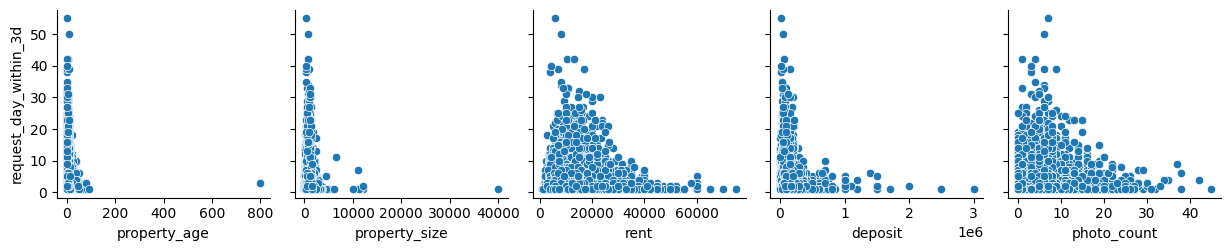

In [55]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d']
             
                  )
plt.show()


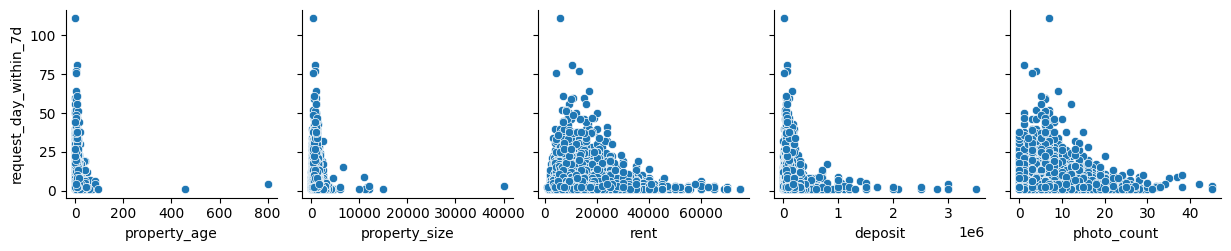

In [56]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d']
             
                  )
plt.show()

### **4. Feature Engineering [Remove Outliers]**

In [57]:
# Function to remove outliers using quantiles 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 2 * iqr
    fence_high = q3 + 2 * iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_high) & (df_in[col_name] >= fence_low)]
    return df_out

In [58]:
df_num.columns

Index(['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age',
       'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count',
       'request_day_within_7d', 'request_day_within_3d'],
      dtype='object')

In [59]:
df = dataset.copy()
for col in df_num.columns:
    if col in ['gym', 'lift', 'swimming_pool',  'request_day_within_3d', 'request_day_within_7d']:
        continue
        
    df = remove_outlier(df , col)

In [60]:
def capping_for_3days(x):
    num = 10
    if x > num:
        return num
    else :
        return x
def capping_for_7days(x):
    num = 20
    if x > num:
        return num
    else :
        return x

In [61]:
df['request_day_within_3d_capping'] = df['request_day_within_3d'].apply(capping_for_3days)
df['request_day_within_7d_capping'] = df['request_day_within_7d'].apply(capping_for_7days)

In [62]:
df['request_day_within_3d_capping'].value_counts()

request_day_within_3d_capping
1.0     5115
2.0     2403
3.0     1404
4.0      795
5.0      532
10.0     495
6.0      339
7.0      228
8.0      168
9.0      140
Name: count, dtype: int64

In [63]:
df['request_day_within_7d_capping'].value_counts()[:10]

request_day_within_7d_capping
1     4934
2     2923
3     1848
4     1264
5      937
6      663
7      549
8      330
20     319
9      292
Name: count, dtype: int64

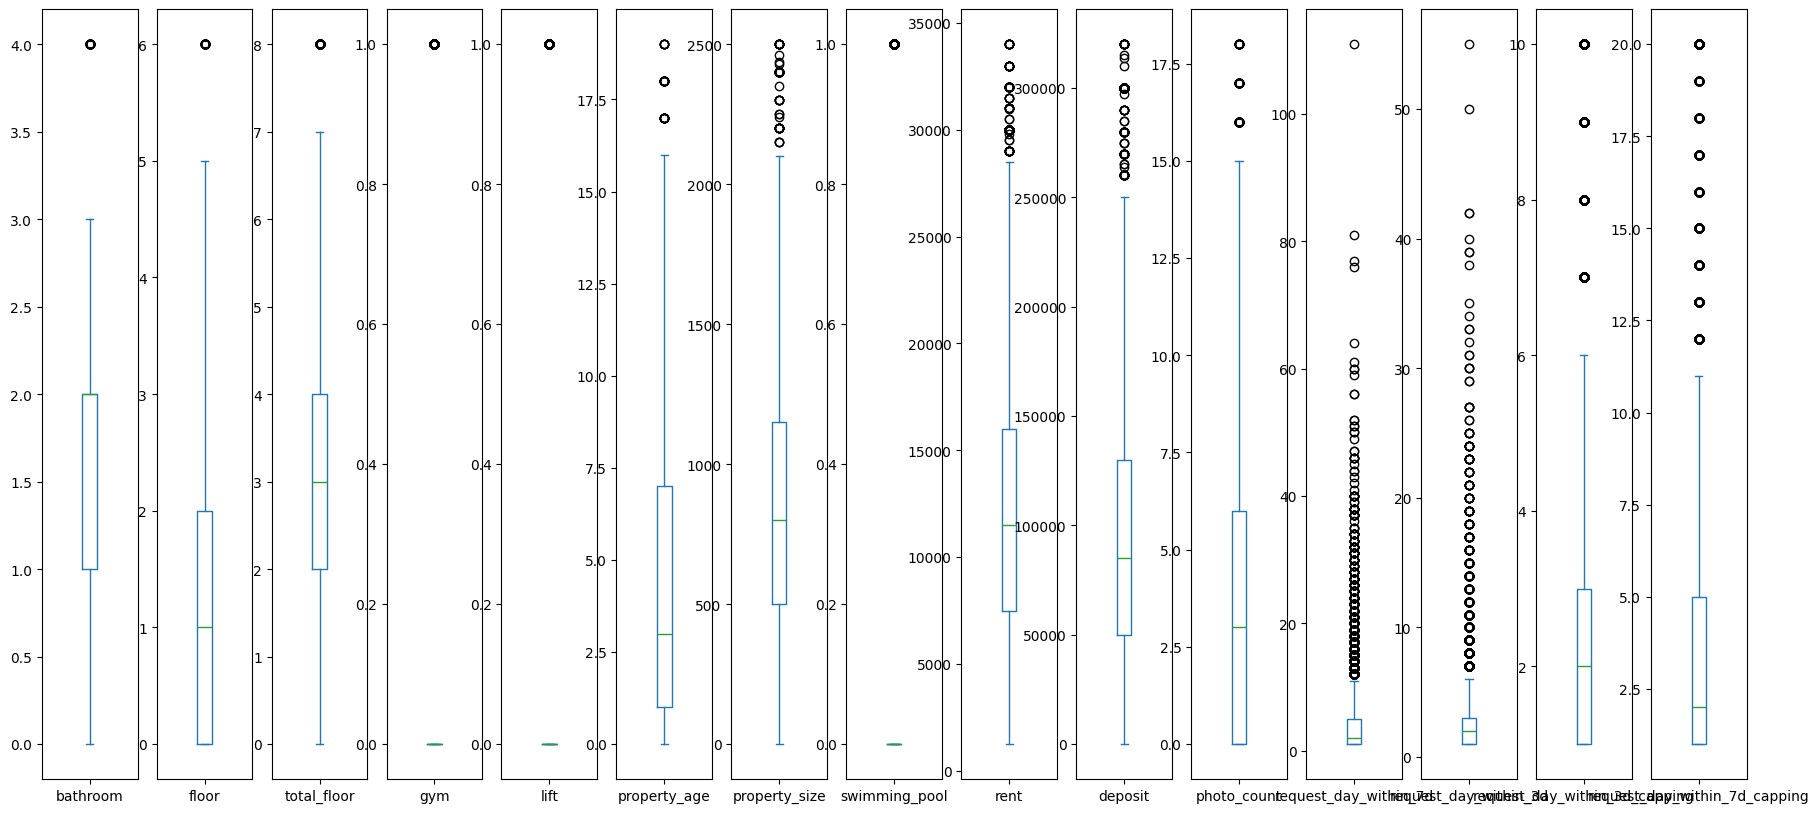

In [64]:
# Box Plot after removing some values
df.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(22,10))
plt.show()

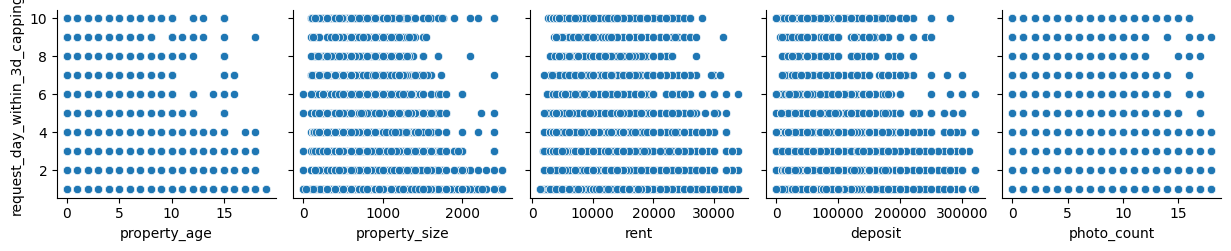

In [65]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d_capping']
                  )
plt.show()

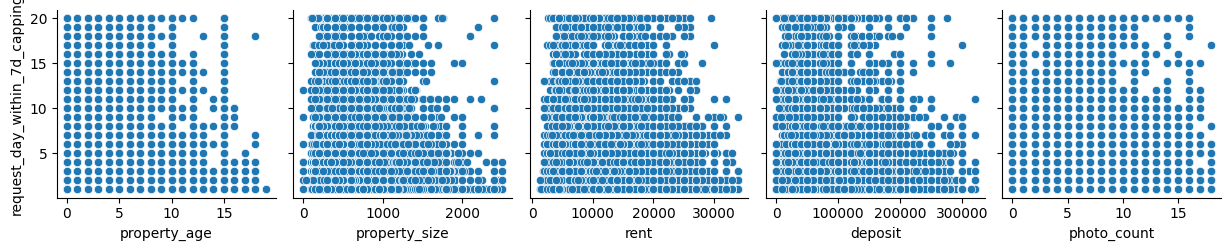

In [66]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d_capping']
             
                  )
plt.show()


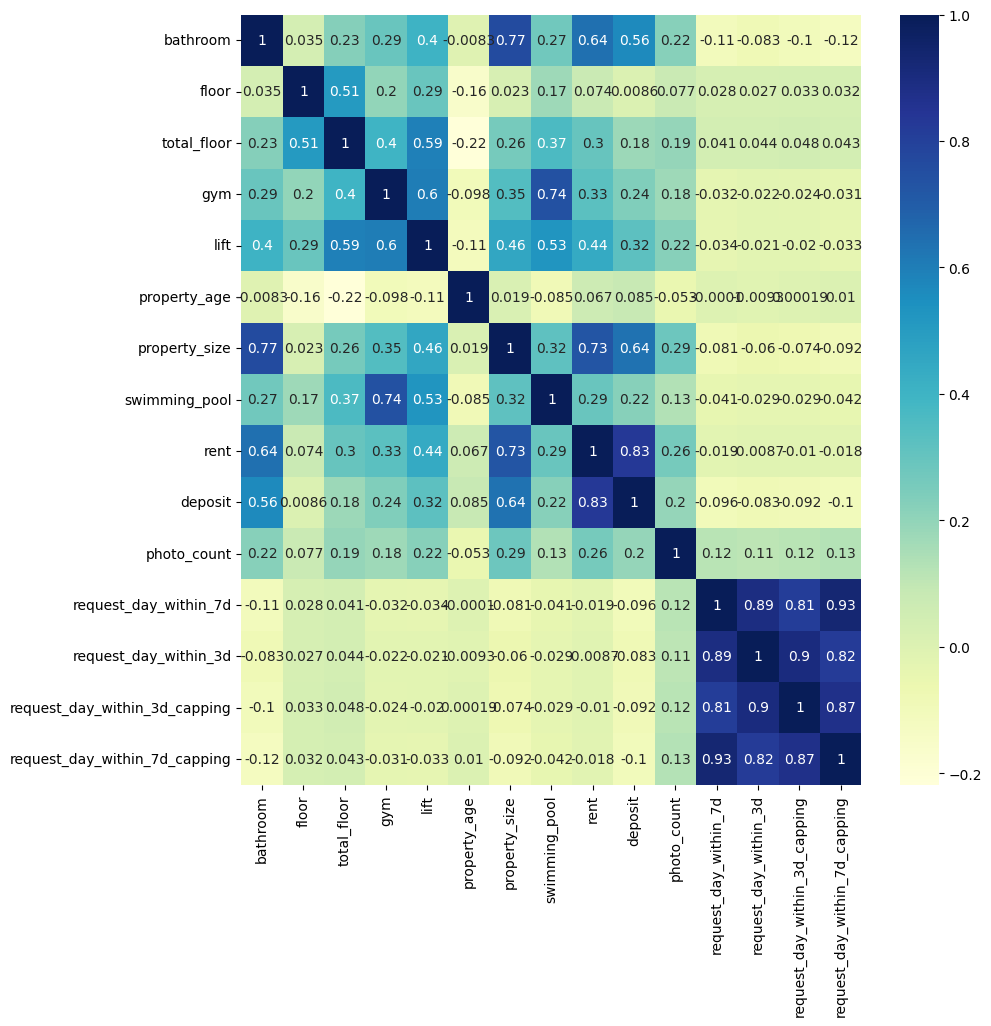

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])  # Excludes non-numeric columns

# Plot heatmap
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)

# Display the heatmap
plt.show()


### **5. One-Hot Encoding**

In [69]:
df.sample(5)

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
5860,BHK1,1,2,2.0,SEMI_FURNISHED,0,FAMILY,0,TWO_WHEELER,0,400,0,4500,50000,IF,0,4,cat_3_to_5,1.0,cat_1_to_2,1.0,4
10387,BHK2,2,0,4.0,SEMI_FURNISHED,0,FAMILY,1,BOTH,3,1300,0,15000,100000,AP,6,5,cat_3_to_5,2.0,cat_1_to_2,2.0,5
13230,BHK2,1,0,1.0,SEMI_FURNISHED,0,ANYONE,0,TWO_WHEELER,6,750,0,14000,80000,IF,6,17,cat_above_5,4.0,cat_3_to_5,4.0,17
2494,BHK1,1,0,1.0,SEMI_FURNISHED,0,ANYONE,0,TWO_WHEELER,2,550,0,7000,40000,IF,5,4,cat_3_to_5,3.0,cat_3_to_5,3.0,4
2377,BHK2,2,2,3.0,SEMI_FURNISHED,0,FAMILY,0,TWO_WHEELER,4,800,0,12000,120000,AP,0,1,cat_1_to_2,1.0,cat_1_to_2,1.0,1


In [70]:
df.columns

Index(['type', 'bathroom', 'floor', 'total_floor', 'furnishing', 'gym',
       'lease_type', 'lift', 'parking', 'property_age', 'property_size',
       'swimming_pool', 'rent', 'deposit', 'building_type', 'photo_count',
       'request_day_within_7d', 'categories_7day', 'request_day_within_3d',
       'categories_3day', 'request_day_within_3d_capping',
       'request_day_within_7d_capping'],
      dtype='object')

In [71]:
# One-Hot Encoder for categorical values
# dividing a data to categorical, numeric and label 
X = df.drop(['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping'] , axis=1)
x_cat_withNull= df[X.select_dtypes(include=['O']).columns]
x_remain_withNull = df[X.select_dtypes(exclude=['O']).columns]
y = df[['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping']]

In [72]:
x_remain = pd.DataFrame()
x_cat = pd.DataFrame()

In [73]:
# Handling Null values
# if we having null values in a numeric columns fill it with mean (Avg) 
for col in x_remain_withNull.columns:
    x_remain[col] = x_remain_withNull[col].fillna((x_remain_withNull[col].mean()))
# if we having null values in a categorical columns fill it with mode
for col in x_cat_withNull.columns:
    x_cat[col] = x_cat_withNull[col].fillna(x_cat_withNull[col].mode()[0])

In [74]:
x_remain.isna().sum()

bathroom         0
floor            0
total_floor      0
gym              0
lift             0
                ..
property_size    0
swimming_pool    0
rent             0
deposit          0
photo_count      0
Length: 11, dtype: int64

In [76]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto' , handle_unknown='ignore')
feature_train = ohe.fit_transform(x_cat).toarray()
feature_labels = ohe.categories_

new_features = []
for i,j in zip(x_cat.columns,feature_labels):
    new_features.append(f"{i}_"+j)

feature_labels = np.array(new_features, dtype=object).ravel()
f=[]
for i in range(feature_labels.shape[0]):
    f.extend(feature_labels[i])


df_features = pd.DataFrame(feature_train, columns=f)

In [77]:
print(df_features.shape)

(15170, 20)


In [78]:
df_features.sample(3)

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH
1699,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11526,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### **6. Min Max Scaler**

In [79]:
# Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler()
x_remain_scaled = sc.fit_transform(x_remain)
x_remain_scaled = pd.DataFrame(x_remain_scaled, columns=x_remain.columns)

In [80]:
y.head(1)

,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
0,4,cat_3_to_5,4.0,cat_3_to_5,4.0,4


In [81]:
# Concatenate data after applying One-Hot Encoding
data_with_3days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_3d',
                                                                                                        'request_day_within_3d_capping',
                                                                                                        'categories_3day']].reset_index(drop=True)], axis=1)

In [82]:
data_with_3days.dropna(inplace=True)
data_with_3days.shape

(11619, 34)

In [83]:
# Concatenate data after applying One-Hot Encoding
data_with_7days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_7d',
                                                                                                        'request_day_within_7d_capping',
                                                                                                        'categories_7day']].reset_index(drop=True)], axis=1)

In [84]:
data_with_7days.dropna(inplace=True)

data_with_7days.shape

(15170, 34)

### **7. Machine Learning [Predicting Interactions within 3 days]**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [87]:
data_with_3days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_3d,request_day_within_3d_capping,categories_3day
8696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.333333,0.5,0.0,1.0,0.052632,0.52,0.0,0.526718,0.15625,0.5,1.0,1.0,cat_1_to_2


In [88]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

##### **i. First Iteration**

In [89]:
# Split data to train and test sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (3.304811)
LASSO: RMS => (3.409854)
KNN: RMS => (3.568629)
CART: RMS => (4.914348)
xgb: RMS => (3.463343)


Based on the results, linear regression has less RMS (root mean square) so he is the best. In the next step, we will try some improvements.

##### **ii. Second Iteration with capping target column**

In [90]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (2.278647)
LASSO: RMS => (2.380321)
KNN: RMS => (2.472879)
CART: RMS => (3.181372)
xgb: RMS => (2.348409)


As a result of this iteration, the result is better, and the best model is still linear regression because it has a lower RMS

##### **iii. Third Iteration with classification**

In [91]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_3day'], test_size = 0.2, random_state = seed)

In [92]:
y['categories_3day'].value_counts()

categories_3day
cat_1_to_2     7518
cat_3_to_5     2731
cat_above_5    1370
Name: count, dtype: int64

In [93]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.65      0.99      0.79      1511
  cat_3_to_5       0.29      0.01      0.01       528
 cat_above_5       0.52      0.04      0.07       285

    accuracy                           0.65      2324
   macro avg       0.49      0.35      0.29      2324
weighted avg       0.55      0.65      0.52      2324



Based on the results, we can find that the f1-score is 65% and that result is not bad but because the data is unbalanced, the model detects cat_1_to_2 is better than the other.

In [94]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.67      0.90      0.77      1511
  cat_3_to_5       0.29      0.12      0.17       528
 cat_above_5       0.31      0.08      0.12       285

    accuracy                           0.62      2324
   macro avg       0.42      0.37      0.35      2324
weighted avg       0.54      0.62      0.55      2324



Based on the results, we can find that the f1-score is 62% and that result is not bad it's better than logistic regression.

### **8. Predicting Interactions Within 7 Days**

In [95]:
data_with_7days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_7d_capping,categories_7day
13305,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.375,1.0,1.0,0.210526,0.46,0.0,0.755725,0.625,0.388889,3,3,cat_3_to_5


In [96]:
X = data_with_7days.drop(['request_day_within_7d',
                          'request_day_within_7d_capping',
                          'categories_7day'], axis=1)
y = data_with_7days[['request_day_within_7d', 'request_day_within_7d_capping', 'categories_7day']]

##### **i. First Iteration**

In [97]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (5.244038)
LASSO: RMS => (5.459693)
KNN: RMS => (5.595868)
CART: RMS => (7.160084)
xgb: RMS => (5.353307)


Based on the results, linear regression has less RMS (root mean square) so he is the best. In the next step, we will try some improvements.

##### **ii. Second Iteration with capping target column**

In [99]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (4.045582)
LASSO: RMS => (4.249220)
KNN: RMS => (4.319263)
CART: RMS => (5.797303)
xgb: RMS => (4.130722)


As a result of this iteration, the result is better, and the best model is still linear regression because it has a lower RMS

##### **iii. Third Iteration with Classification**

In [101]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_7day'], test_size = 0.2, random_state = seed)

In [102]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.55      0.91      0.68      1570
  cat_3_to_5       0.23      0.01      0.03       794
 cat_above_5       0.42      0.22      0.29       670

    accuracy                           0.53      3034
   macro avg       0.40      0.38      0.33      3034
weighted avg       0.44      0.53      0.42      3034



In [103]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.56      0.74      0.64      1570
  cat_3_to_5       0.27      0.19      0.22       794
 cat_above_5       0.37      0.24      0.29       670

    accuracy                           0.48      3034
   macro avg       0.40      0.39      0.38      3034
weighted avg       0.44      0.48      0.45      3034



**Based on the results, classification is a bad choice here.**

Conclusion from findings: ***Linear Regression is better model***